In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import re

In [2]:
data = pd.read_csv('2020.csv')
pd.set_option('display.max_columns', 33)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1250 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1250 non-null   o

In [4]:
data.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.250000e+03,8.850000e+02,373.000000
mean,32.509788,8.047154e+07,6.322459e+05,12.967828
std,5.663804,2.828449e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.885000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


In [5]:
missing_values = data.isna()
print(missing_values[missing_values > 0])

     Timestamp  Age Gender City Position  Total years of experience  \
0          NaN  NaN    NaN  NaN       NaN                       NaN   
1          NaN  NaN    NaN  NaN       NaN                       NaN   
2          NaN  NaN    NaN  NaN       NaN                       NaN   
3          NaN  NaN    NaN  NaN       NaN                       NaN   
4          NaN  NaN    NaN  NaN       NaN                       NaN   
...        ...  ...    ...  ...       ...                       ...   
1245       NaN  NaN    NaN  NaN       NaN                       NaN   
1246       NaN  NaN    NaN  NaN       NaN                       NaN   
1247       NaN  NaN    NaN  NaN       NaN                       NaN   
1248       NaN  NaN    NaN  NaN       NaN                       NaN   
1249       NaN  NaN    NaN  NaN       NaN                       NaN   

     Years of experience in Germany Seniority level  \
0                               NaN             NaN   
1                               NaN  

In [6]:
data_cleaned = data.dropna()

In [7]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 35 to 1249
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                144 non-null    object 
 1   Age                                                                                                                      144 non-null    float64
 2   Gender                                                                                                                   144 non-null    object 
 3   City                                                                                                                     144 non-null    object

In [8]:
missing_values = data_cleaned.isna()
print(missing_values[missing_values > 0])

     Timestamp  Age Gender City Position  Total years of experience  \
35         NaN  NaN    NaN  NaN       NaN                       NaN   
141        NaN  NaN    NaN  NaN       NaN                       NaN   
221        NaN  NaN    NaN  NaN       NaN                       NaN   
225        NaN  NaN    NaN  NaN       NaN                       NaN   
276        NaN  NaN    NaN  NaN       NaN                       NaN   
...        ...  ...    ...  ...       ...                       ...   
1226       NaN  NaN    NaN  NaN       NaN                       NaN   
1230       NaN  NaN    NaN  NaN       NaN                       NaN   
1233       NaN  NaN    NaN  NaN       NaN                       NaN   
1234       NaN  NaN    NaN  NaN       NaN                       NaN   
1249       NaN  NaN    NaN  NaN       NaN                       NaN   

     Years of experience in Germany Seniority level  \
35                              NaN             NaN   
141                             NaN  

In [9]:
data_cleaned.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,144.000000,144.000000,144.000000,144.000000
mean,33.173611,74625.881944,66752.756944,11.524306
std,5.055399,24351.120077,18147.140439,15.856803
min,22.000000,14712.000000,14712.000000,0.000000
25%,30.000000,60000.000000,55750.000000,0.000000
50%,33.000000,74000.000000,67000.000000,0.000000
75%,36.000000,84775.000000,75000.000000,30.000000
max,54.000000,180000.000000,130000.000000,40.000000


In [10]:
data_cleaned.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
35,24/11/2020 11:28:14,33.0,Male,Berlin,Data Scientist,5,4,Lead,Python,"Python, R, Google Cloud, Docker",150000.0,80000,81000.0,4000,24,Full-time employee,Unlimited contract,English,1000+,Product,No,0.0,1
141,24/11/2020 12:09:03,34.0,Male,Munich,Cloud Architect,10,4,Senior,"Azure, SAP","SAP / ABAP, AWS, Google Cloud, Azure, Kubernet...",120000.0,40000,70000.0,30000,30,Full-time employee,Unlimited contract,English,1000+,Cloud,No,0.0,1000
221,24/11/2020 13:33:08,32.0,Male,Stuttgart,QA Engineer,9,9,Senior,Java,"R, SQL, Perl, Docker",60000.0,4700,67000.0,5000,30,Full-time employee,Unlimited contract,German,1000+,Consulting / Agency,No,40.0,50
225,24/11/2020 13:37:57,24.0,Male,Boeblingen,C/C++/Java developer,0.8,0.8,Junior,Java,C/C++,48000.0,101,48000.0,101,30,Full-time employee,Unlimited contract,English,11-50,Product,No,40.0,250
276,24/11/2020 14:58:11,38.0,Male,Munich,Backend Developer,12,12,Senior,Java,"PHP, Javascript / Typescript, SQL",70000.0,1500,68000.0,1500,30,Full-time employee,Unlimited contract,German,101-1000,Telecommunications,No,0.0,675


In [11]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
age = data_cleaned['Age']
salary = data_cleaned['Yearly brutto salary (without bonus and stocks) in EUR']

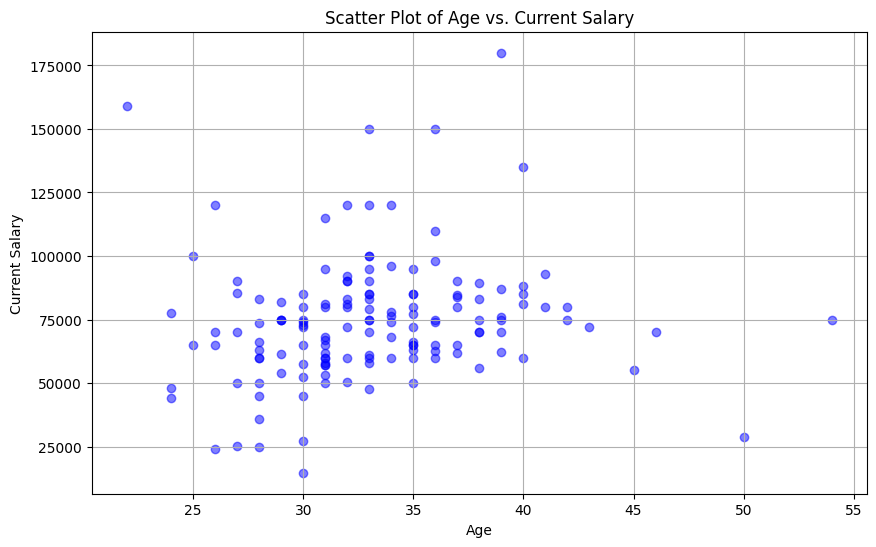

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(age, salary, alpha=0.5, color='blue')

plt.title('Scatter Plot of Age vs. Current Salary')
plt.xlabel('Age')
plt.ylabel('Current Salary')
plt.grid(True)

plt.show()

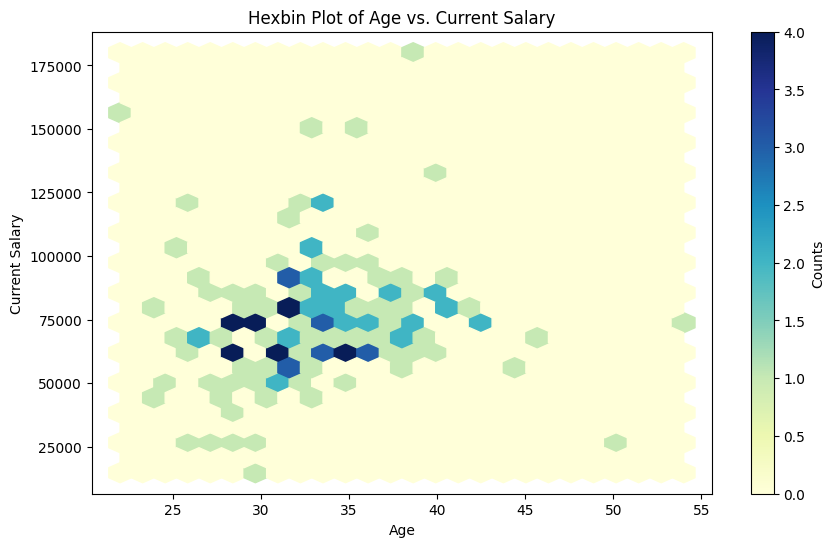

In [15]:

plt.figure(figsize=(10, 6))
plt.hexbin(age, salary, gridsize=25, cmap='YlGnBu')  

plt.title('Hexbin Plot of Age vs. Current Salary')
plt.xlabel('Age')
plt.ylabel('Current Salary')
plt.colorbar(label='Counts')

plt.show()

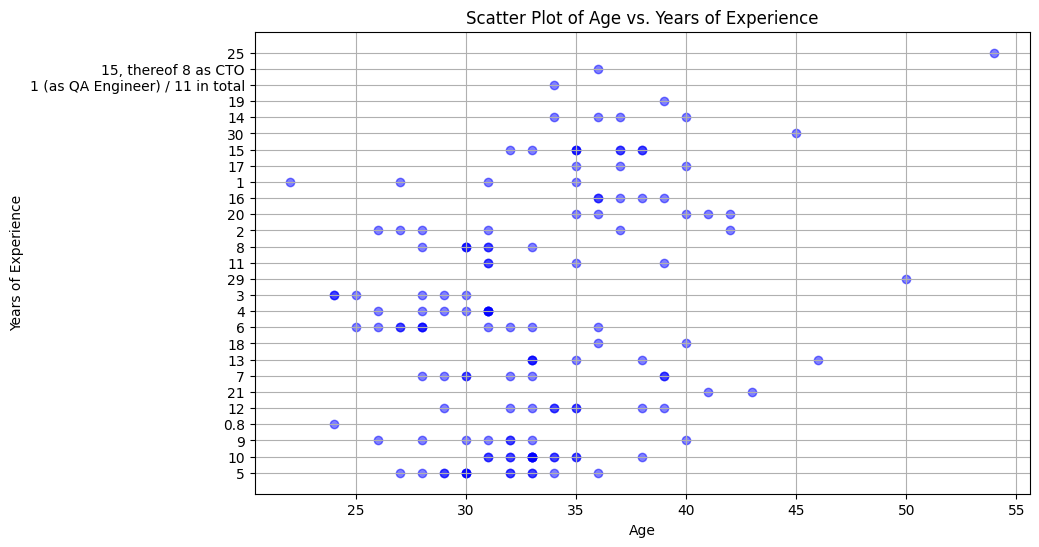

In [17]:
age = data_cleaned['Age']
experience = data_cleaned['Total years of experience']

plt.figure(figsize=(10, 6))
plt.scatter(age, experience, c='blue', alpha=0.5)  

plt.title('Scatter Plot of Age vs. Years of Experience')
plt.xlabel('Age')
plt.ylabel('Years of Experience')

plt.grid(True)
plt.show()

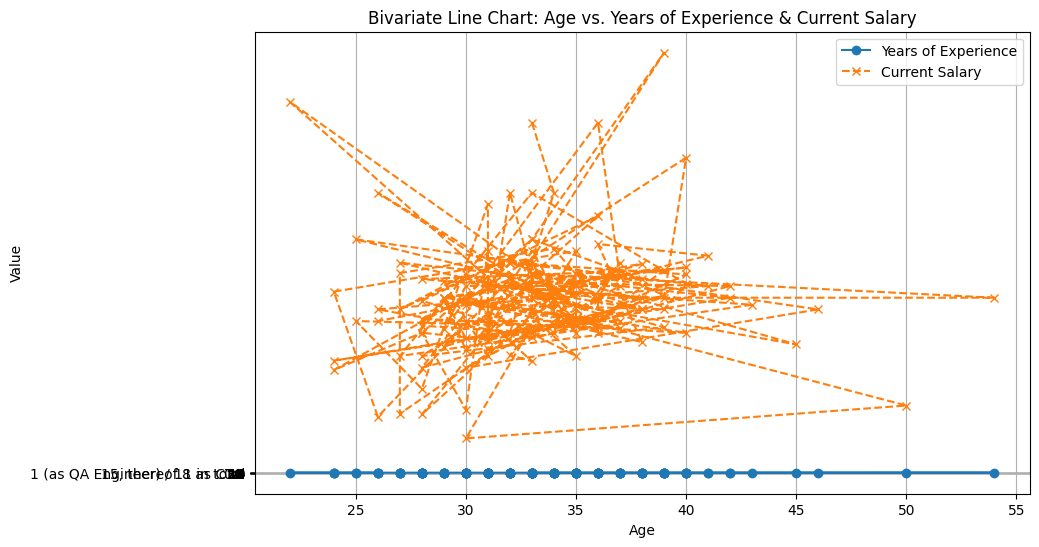

In [18]:
age = data_cleaned['Age']
experience = data_cleaned['Total years of experience']
salary = data_cleaned['Yearly brutto salary (without bonus and stocks) in EUR']

plt.figure(figsize=(10, 6))
plt.plot(age, experience, label='Years of Experience', marker='o', linestyle='-')
plt.plot(age, salary, label='Current Salary', marker='x', linestyle='--')

plt.title('Bivariate Line Chart: Age vs. Years of Experience & Current Salary')
plt.xlabel('Age')
plt.ylabel('Value')
plt.legend()

plt.grid(True)
plt.show()

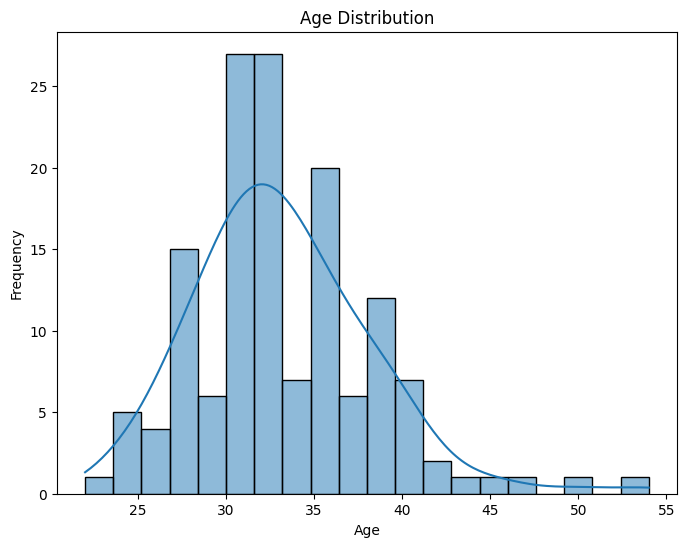

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

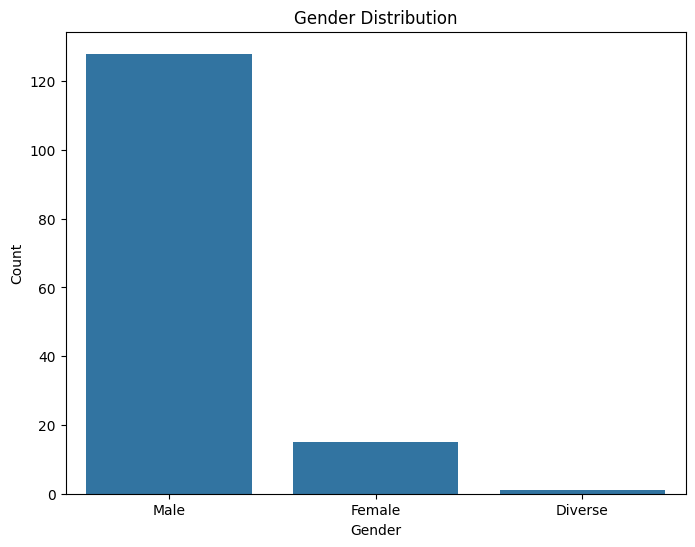

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

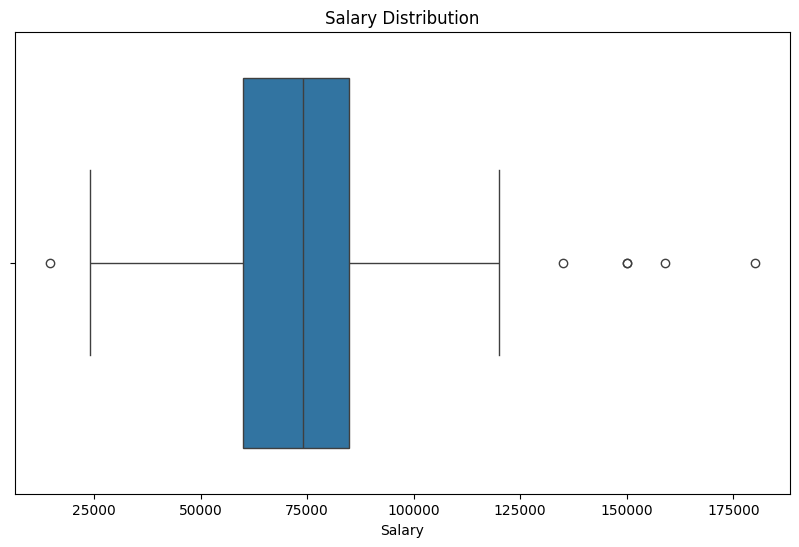

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned, x='Yearly brutto salary (without bonus and stocks) in EUR')
plt.xlabel('Salary')
plt.title('Salary Distribution')
plt.show()

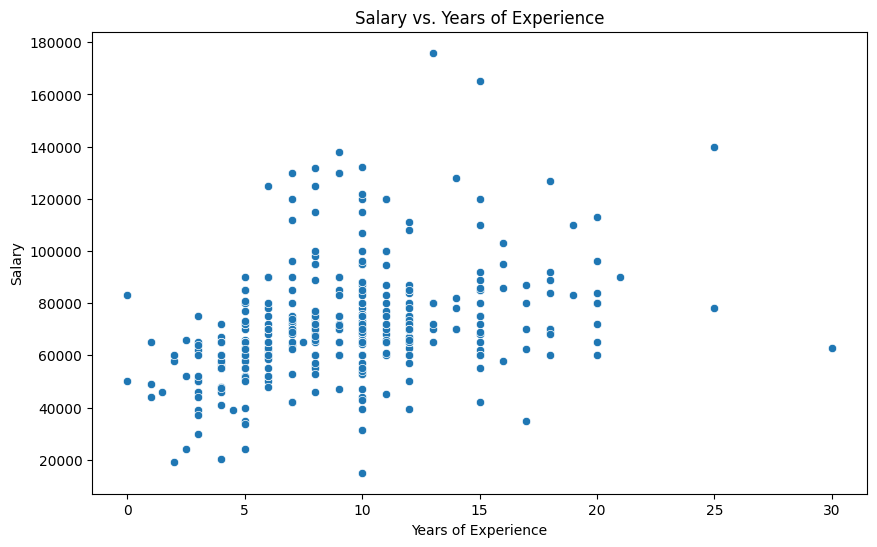

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='Years of experience', y='Current Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience')
plt.show()